In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
import numpy as np
from scipy.signal import convolve2d

input_matrix = np.array([   [1,1,1,1,0,0,0,0],
                            [1,1,1,1,0,0,0,0],
                            [1,1,1,1,0,0,0,0],
                            [1,1,1,1,0,0,0,0],
                            [1,1,1,1,0,0,0,0],
                            [1,1,1,1,0,0,0,0]     ])

kernel = np.array([
    [0.25, 0, -0.25],
    [0.5,  0,  -0.5],
    [0.25, 0, -0.25]
])

convolved_matrix = convolve2d(input_matrix, kernel, mode='valid')

print("Input Matrix:")
print(input_matrix)
print("\nKernel:")
print(kernel)
print("\nConvolved Matrix:")
print(convolved_matrix)


Input Matrix:
[[1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0]]

Kernel:
[[ 0.25  0.   -0.25]
 [ 0.5   0.   -0.5 ]
 [ 0.25  0.   -0.25]]

Convolved Matrix:
[[ 0.  0. -1. -1.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.]]


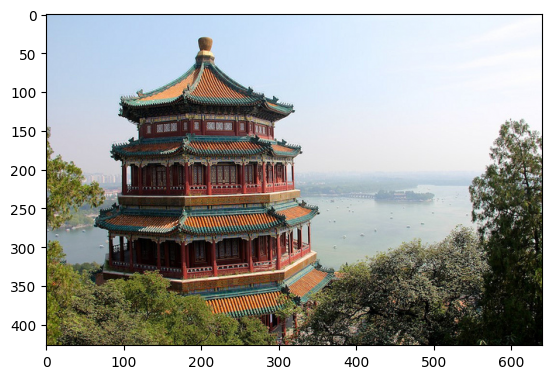

In [3]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg') / 255
plt.imshow(china)

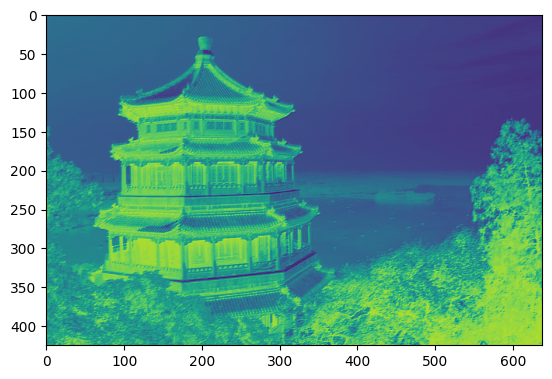

In [21]:
convL = tf.keras.layers.Conv2D(filters=1, kernel_size=3) #padding='same'
result = convL(np.array([china]))
plt.imshow(result[0])

<function matplotlib.pyplot.show(close=None, block=None)>

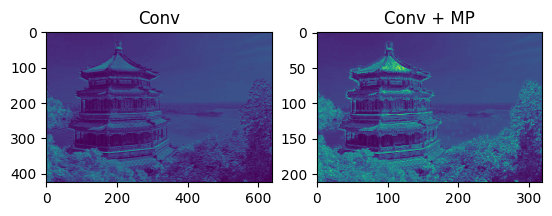

In [25]:
convL = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu')
plt.subplot(1, 2, 1)
result = convL(np.array([china]))
plt.imshow(result[0])
plt.title('Conv')

mp = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(result)
plt.subplot(1, 2, 2)
plt.imshow(mp[0])
plt.title('Conv + MP')

plt.show

In [26]:
from keras import layers
from keras import models

In [27]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,058 (414.29 KB)

 Trainable params: 106,058 (414.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [30]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8138 - loss: 0.5554 - val_accuracy: 0.9810 - val_loss: 0.0545
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9827 - loss: 0.0565 - val_accuracy: 0.9836 - val_loss: 0.0526
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9888 - loss: 0.0370 - val_accuracy: 0.9857 - val_loss: 0.0438
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9914 - loss: 0.0280 - val_accuracy: 0.9881 - val_loss: 0.0407
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9938 - loss: 0.0223 - val_accuracy: 0.9918 - val_loss: 0.0280


In [93]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9872 - loss: 0.0392
0.9900000095367432
